In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, kendalltau
from cliffs_delta import cliffs_delta

sns.set_theme(style="whitegrid", context='paper', palette='Greys')

## Metrics Distribution

In [2]:
data_mlp = pd.read_csv("result_class_mlp/bias_symptoms.csv", index_col=[0, 1])
data_rf = pd.read_csv("result_class_rf/bias_symptoms.csv", index_col=[0, 1])

In [3]:
distr = pd.DataFrame(
    [
        {
            "Statistical Parity": [
                data_mlp[data_mlp["statistical_parity"] == 0].shape[0]
                / data_mlp.shape[0],
                data_mlp[data_mlp["statistical_parity"] == 1].shape[0]
                / data_mlp.shape[0],
            ],
            "Equal Opportunity": [
                data_mlp[data_mlp["equal_opportunity"] == 0].shape[0]
                / data_mlp.shape[0],
                data_mlp[data_mlp["equal_opportunity"] == 1].shape[0]
                / data_mlp.shape[0],
            ],
            "Average Odds": [
                data_mlp[data_mlp["average_odds"] == 0].shape[0] / data_mlp.shape[0],
                data_mlp[data_mlp["average_odds"] == 1].shape[0] / data_mlp.shape[0],
            ],
            "Bias": ["Low", "High"],
        }
    ]
)

In [4]:
distr = distr.explode(['Statistical Parity', 'Equal Opportunity', 'Average Odds', 'Bias']).melt(id_vars='Bias', var_name='Metric', value_name='Proportion')

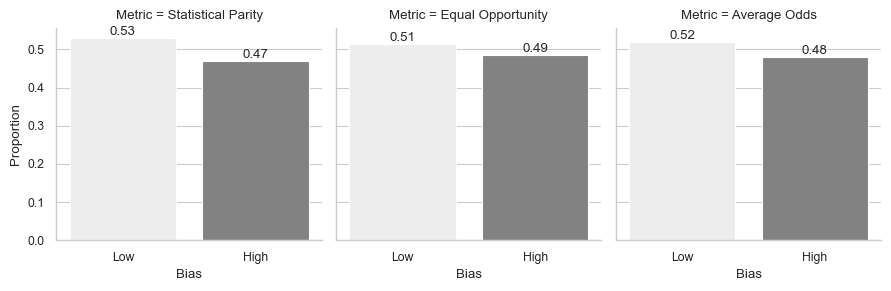

In [5]:
g = sns.catplot(
    data=distr,
    col="Metric",
    x="Bias",
    y="Proportion",
    kind="bar",
    hue="Bias",
    palette=sns.color_palette()[0:4:3],
    height=3,
    aspect=1,
)


g.facet_axis(0, 0).bar_label(g.facet_axis(0, 0).containers[0], fmt="%.2f")
g.facet_axis(0, 0).bar_label(g.facet_axis(0, 0).containers[1], fmt="%.2f")
g.facet_axis(0, 1).bar_label(g.facet_axis(0, 1).containers[0], fmt="%.2f")
g.facet_axis(0, 1).bar_label(g.facet_axis(0, 1).containers[1], fmt="%.2f")
g.facet_axis(0, 2).bar_label(g.facet_axis(0, 2).containers[0], fmt="%.2f")
g.facet_axis(0, 2).bar_label(g.facet_axis(0, 2).containers[1], fmt="%.2f")
plt.savefig("figs/metrics_distr_mlp.pdf", bbox_inches="tight")
plt.show()

In [6]:
distr = pd.DataFrame(
    [
        {
            "Statistical Parity": [
                data_rf[data_rf["statistical_parity"] == 0].shape[0]
                / data_rf.shape[0],
                data_rf[data_rf["statistical_parity"] == 1].shape[0]
                / data_rf.shape[0],
            ],
            "Equal Opportunity": [
                data_rf[data_rf["equal_opportunity"] == 0].shape[0]
                / data_rf.shape[0],
                data_rf[data_rf["equal_opportunity"] == 1].shape[0]
                / data_rf.shape[0],
            ],
            "Average Odds": [
                data_rf[data_rf["average_odds"] == 0].shape[0] / data_rf.shape[0],
                data_rf[data_rf["average_odds"] == 1].shape[0] / data_rf.shape[0],
            ],
            "Bias": ["Low", "High"],
        }
    ]
)

distr = distr.explode(
    ["Statistical Parity", "Equal Opportunity", "Average Odds", "Bias"]
).melt(id_vars="Bias", var_name="Metric", value_name="Proportion")

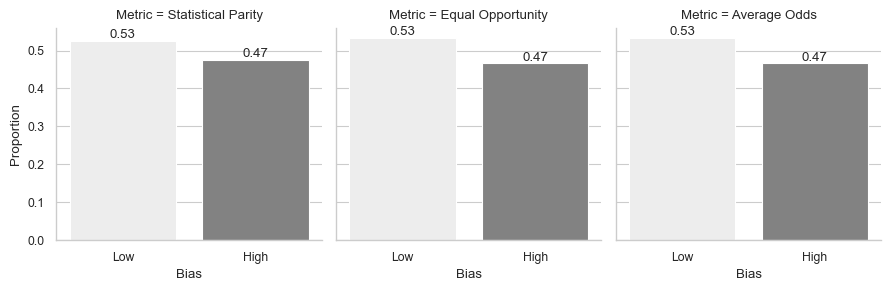

In [7]:
g = sns.catplot(
    data=distr,
    col="Metric",
    x="Bias",
    y="Proportion",
    kind="bar",
    hue="Bias",
    palette=sns.color_palette()[0:4:3],
    height=3,
    aspect=1,
)


g.facet_axis(0, 0).bar_label(g.facet_axis(0, 0).containers[0], fmt="%.2f")
g.facet_axis(0, 0).bar_label(g.facet_axis(0, 0).containers[1], fmt="%.2f")
g.facet_axis(0, 1).bar_label(g.facet_axis(0, 1).containers[0], fmt="%.2f")
g.facet_axis(0, 1).bar_label(g.facet_axis(0, 1).containers[1], fmt="%.2f")
g.facet_axis(0, 2).bar_label(g.facet_axis(0, 2).containers[0], fmt="%.2f")
g.facet_axis(0, 2).bar_label(g.facet_axis(0, 2).containers[1], fmt="%.2f")
plt.savefig("figs/metrics_distr_rf.pdf", bbox_inches="tight")
plt.show()